<a href="https://colab.research.google.com/github/Asoares10/Data-Science/blob/main/An%C3%A1lise%20dos%20Dados%20do%20Airbnb%20-%20Porto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - Porto

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Porto, e ver quais insights podem ser extraídos a partir de dados brutos.**

Porto além do seu charme inconfundível tem atrações para todos os gostos e idades. Confira ai!

Atualmente, com o turismo em Portugal em alta (+ de 20 milhões de turistas/ano), ambas as cidades duelam não só no futebol (Porto x Benfica), mas também em uma sadia competição para ver quem atrai mais turistas. É meio que como uma versão portuguesa de Madri x Barcelona.

A cidade do Porto já foi capital de Portugal. Isto foi logo no início da história portuguesa, quando após um curto período de dominação moura, os lusitanos recuperaram a cidade em 868, transformando-a anos mais tarde na capital da nação (lembrando que Portugal foi um dos primeiros países a se organizar como nação).

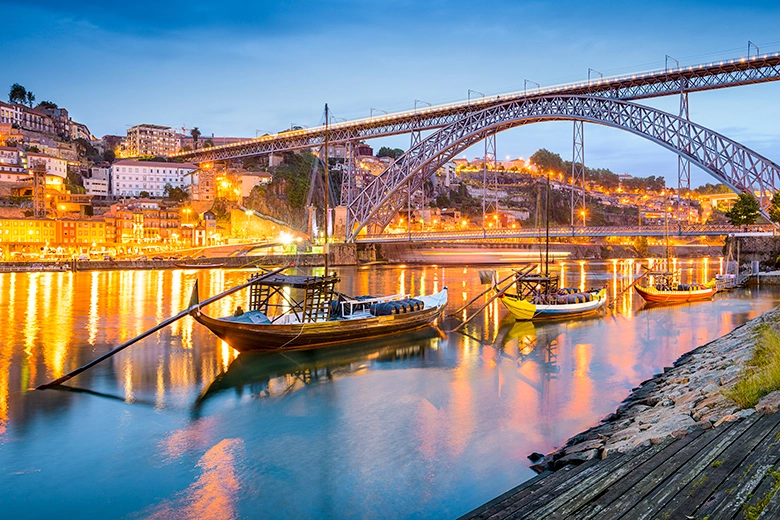

## Obtenção dos Dados


In [10]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [39]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/portugal/norte/porto/2022-12-16/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,41339,Porto city flat near the sea,180050,Paula,PORTO,Lordelo do Ouro e Massarelos,41.15010,-8.66035,Entire home/apt,60,2,20,2022-07-28,0.17,1,93,3,29049/AL
1,55111,Fontielas Houses |Floor1 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17481,-8.35362,Entire home/apt,66,3,15,2022-08-29,0.17,3,0,1,7563/AL
2,73828,Fontielas Houses |Floor0 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17449,-8.35426,Entire home/apt,66,5,12,2022-08-22,0.13,3,0,4,7563/AL
3,86388,A Formosa - a nest made for two,185209,João,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.14918,-8.60922,Private room,33,2,194,2022-11-27,1.37,8,314,45,6995/AL
4,87873,Oporto Apartment Triplex,480980,Paula,PORTO,Bonfim,41.15786,-8.60427,Entire home/apt,64,3,225,2022-11-24,1.74,3,281,31,634/AL


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [12]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 12013
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [13]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
# mostrando a quantidade de dados ausentes por variável
(df.isnull().sum()).sort_values(ascending=False)
# dados ausentes por data
df.set_index('last_review').isna().sum(level=0)

# verificando dados ausentes
(df.isnull().sum()).sort_values(ascending=False)

<ipython-input-13-271e0b6e9181>:6: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df.set_index('last_review').isna().sum(level=0)


reviews_per_month                 1299
last_review                       1299
license                            678
host_name                            4
minimum_nights                       0
number_of_reviews_ltm                0
availability_365                     0
calculated_host_listings_count       0
number_of_reviews                    0
id                                   0
name                                 0
room_type                            0
longitude                            0
latitude                             0
neighbourhood                        0
neighbourhood_group                  0
host_id                              0
price                                0
dtype: int64

In [14]:
# excluindo colunas com dados faltantes
df.drop(columns=['reviews_per_month', 'last_review'], inplace=True)

In [ ]:
# excluindo entradas com dados faltantes
df.dropna(axis=0, inplace=True)

In [16]:
# convertendo os tipos de dados
df[['price','latitude', 'longitude']] = df[['price','latitude', 'longitude']].astype('float')

In [17]:
# visualizando
df[1:300]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
1,55111,Fontielas Houses |Floor1 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17481,-8.35362,Entire home/apt,66.0,3,15,3,0,1,7563/AL
2,73828,Fontielas Houses |Floor0 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17449,-8.35426,Entire home/apt,66.0,5,12,3,0,4,7563/AL
3,86388,A Formosa - a nest made for two,185209,João,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.14918,-8.60922,Private room,33.0,2,194,8,314,45,6995/AL
4,87873,Oporto Apartment Triplex,480980,Paula,PORTO,Bonfim,41.15786,-8.60427,Entire home/apt,64.0,3,225,3,281,31,634/AL
5,91439,A Formosa 2 -The red sofa room,185209,João,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.14908,-8.60905,Private room,35.0,2,191,8,324,40,6995/AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2488617,APARTAMENTO DA BAIXA - 5636/AL,12736452,Pedro,PORTO,Bonfim,41.15480,-8.60466,Entire home/apt,65.0,4,83,1,118,0,5636/AL
296,1694480,Ribeira Cinema Apartments _ 1 Bedroom Apartment,1619243,Tomé Receptionist,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.14114,-8.60910,Entire home/apt,123.0,1,22,4,305,10,32112/AL
297,2492899,Almond Biscuit APT Historic Center,12759224,Elisa And Luís,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.14454,-8.61730,Entire home/apt,85.0,3,143,5,341,10,5622/AL
298,3165433,Cordoaria Guest House 2 - Downtown,16055999,Sílvia E André,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.14716,-8.61653,Entire home/apt,70.0,2,342,2,329,36,52599/AL


Feita a limpeza, é hora de conferir os resultados.

In [15]:
# verificando o resultado
(df.isnull().sum()).sort_values(ascending=False)

license                           678
host_name                           4
id                                  0
name                                0
host_id                             0
neighbourhood_group                 0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
dtype: int64

Limpando Outliers
Para tratar dos outliers desse conjunto de dados, iremos analisar a distribuição estatística, plotar boxplots e calcular os limites utilizando a regra do IQR Score.

Primeiramente, vamos lembrar o que é o IQR.

O IQR é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil (25%).

**IQR = Q3 - Q1**
Vamos dar uma olhada nos nossos dados e ver o que identificamos.

In [18]:
# verificando a distribuição estatística
df.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.201300e+04,12013.0,12013.0,12013.0,12013.0,12013.0,12013.0,12013.0,12013.0,12013.0
mean,1.616739e+17,177127452.1,41.2,-8.6,113.0,3.8,51.2,19.9,237.7,15.8
std,2.866940e+17,157004709.1,0.1,0.1,1173.9,32.5,80.2,44.5,126.8,19.6
min,4.133900e+04,180050.0,40.8,-8.8,9.0,1.0,0.0,1.0,0.0,0.0
25%,2.120240e+07,36140658.0,41.1,-8.6,47.0,1.0,4.0,1.0,147.0,1.0
50%,3.735471e+07,130805492.0,41.1,-8.6,65.0,2.0,19.0,4.0,288.0,8.0
75%,5.415833e+07,295423748.0,41.2,-8.6,94.0,2.0,63.0,13.0,347.0,25.0
max,7.824658e+17,491296442.0,41.5,-8.2,89120.0,1125.0,818.0,245.0,365.0,170.0


Aqui, algumas coisas já chamam a nossa atenção, como por exemplo:

*   A variável price tem o mínimo em 9.0.
*   Lembrando que a variável price trata do preço da diária dos imóveis em moeda local (EUR).
*   A variável minimum_nights tem como seu máximo o valor 11331, sendo que o Q3 está em 2	. Claramente temos outliers nessa variável.
*As variáveis number_of_reviews, calculated_host_listings_count e 
*   availability_365 também podem conter outliers, mas não vamos nos preocupar com elas agora.





*

### **Q3. Qual o tipo de distribuição das variáveis?** 

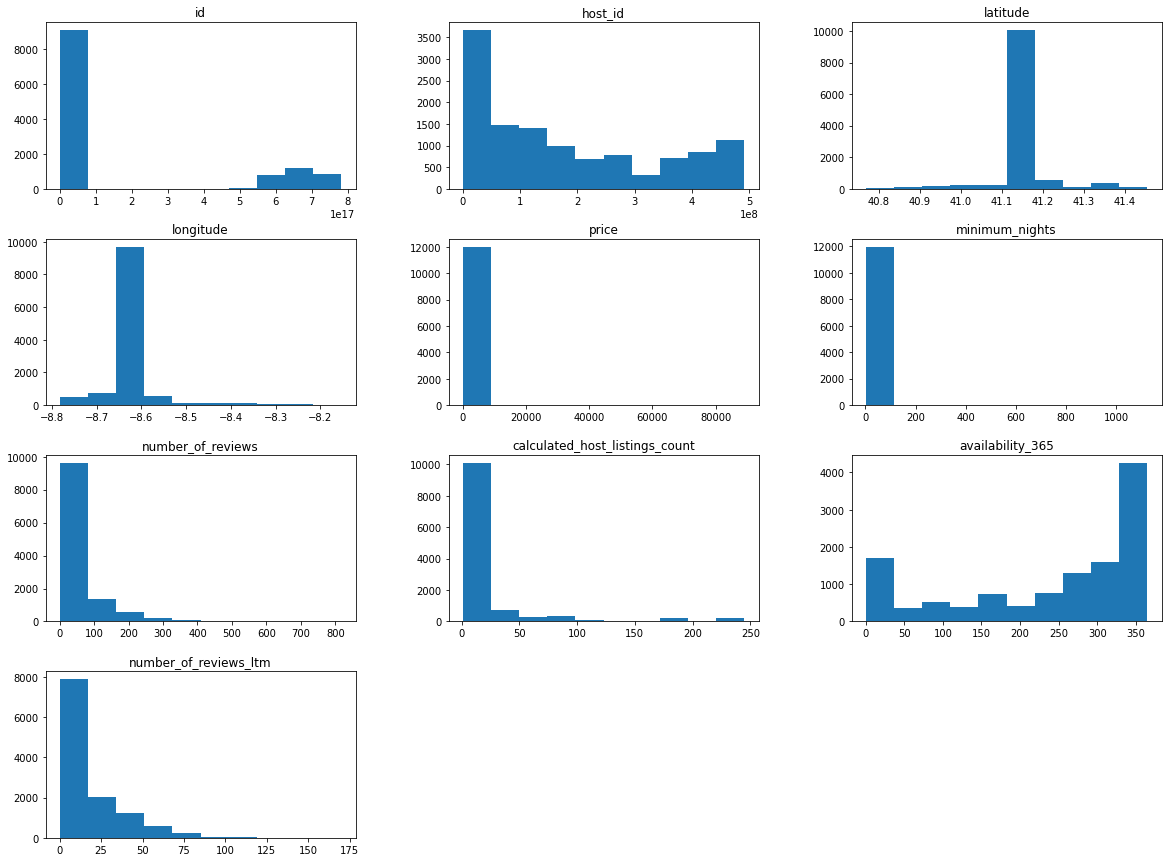

In [19]:
# verificando as distribuições
df.hist(figsize=(20,15), grid=False);

Verificando os histogramas, conseguimos ver claramente que temos outliers presentes. Para tratá-los vamos seguir os seguintes passos:



*   Definir o Q1 e Q3 para as variáveis que serão limpas.
*   Calcular o IQR para as variáveis.
*   Definir o limite superior e inferior para cortar os outliers.
*   Remover os outliers.








In [20]:
# identificando os outliers para a variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)


IQR da variável price:  47.0
Limite superior de price:  164.5
Limite inferior de price:  -23.5


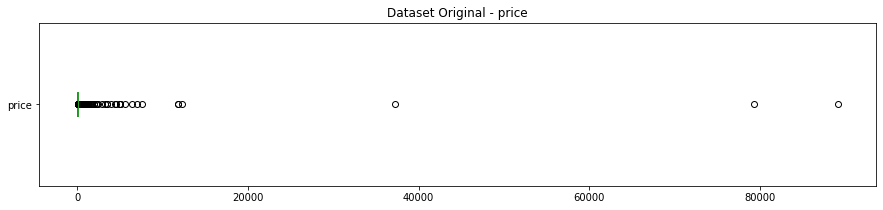

O dataset possui 11331 colunas
192 Entradas acima de 335.5
Representam 1.69% do dataset


In [ ]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 335.5".format(len(df[df.price > 335.5])))
print("Representam {:.2f}% do dataset".format((len(df[df.price > 335.5]) / df.shape[0])*100))

In [23]:
# limpando o dataset
df_clear = df.copy()

df_clear.drop(df_clear[df_clear.price > 335.5].index, axis=0, inplace=True)
df_clear.drop(df_clear[df_clear.price == 0.0].index, axis=0, inplace=True)
df_clear.drop(df_clear[df_clear.minimum_nights > 12].index, axis=0, inplace=True)

print('Shape antes da limpeza: ',df.shape)
print('Shape após a limpeza: ',df_clear.shape)

Shape antes da limpeza:  (12013, 16)
Shape após a limpeza:  (11582, 16)


Aqui podemos ver que, apesar de não termos outliers na parte inferior, continuamos tendo valores iguais a zero, que precisam ser tratados.

Vamos plotar um boxplot para visualizarmos a diferença feita pela limpeza.

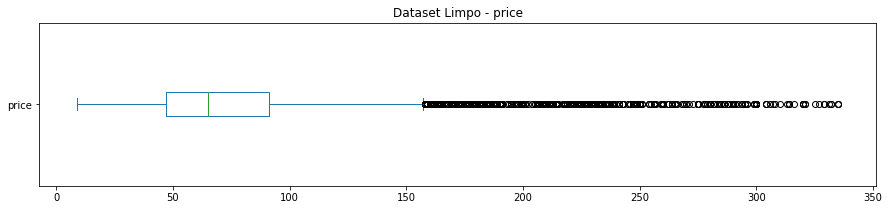

Tamanho original: 11582 colunas
Tamanho atual: 11582 colunas


In [24]:
# verificando o conjunto limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clear.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - price')
plt.show()
print("Tamanho original: {} colunas".format(df_clear.shape[0]))
print("Tamanho atual: {} colunas".format(df_clear.shape[0]))

Aqui podemos ver o resultado da limpeza.

O boxplot mostra alguns dados como outliers, entretanto, esses estão sendo calculados em relação ao novo dataset, e nossa limpeza levou em consideração os quartis do dado original.

Para garantirmos que não estamos lidando com outliers que vão prejudicar nossa análise, vamos checar os histogramas novamente.



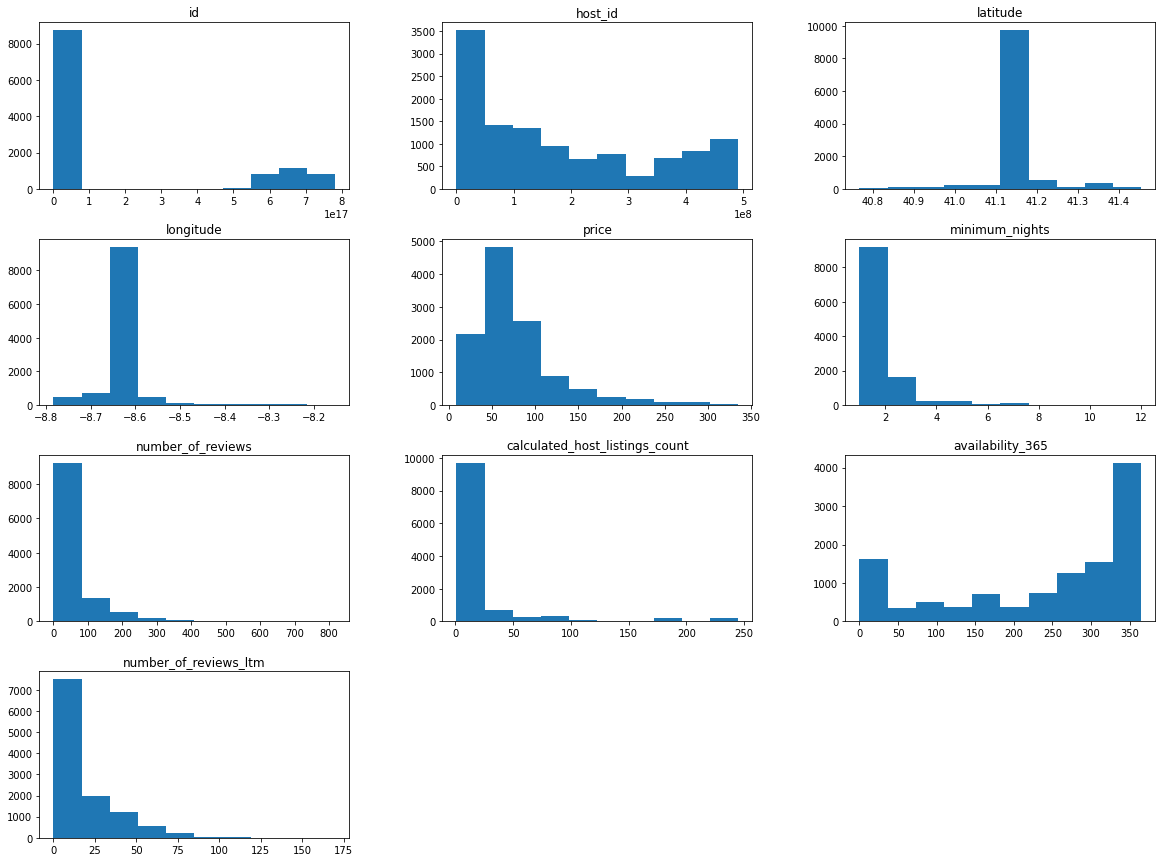

In [25]:
# verificando as distribuições
df_clear.hist(figsize=(20,15), grid=False);

In [26]:
# verificando a distribuição estatística dos dados limpos
df_clear.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.158200e+04,11582.0,11582.0,11582.0,11582.0,11582.0,11582.0,11582.0,11582.0,11582.0
mean,1.631813e+17,177786899.1,41.2,-8.6,77.6,2.0,52.2,20.1,238.9,16.2
std,2.875487e+17,157435050.8,0.1,0.1,48.9,1.2,80.8,44.7,126.1,19.7
min,4.133900e+04,180050.0,40.8,-8.8,9.0,1.0,0.0,1.0,0.0,0.0
25%,2.133214e+07,36340146.5,41.1,-8.6,47.0,1.0,4.0,2.0,151.0,1.0
50%,3.746687e+07,130805492.0,41.1,-8.6,65.0,2.0,20.0,5.0,289.0,8.0
75%,5.426266e+07,296708683.2,41.2,-8.6,91.0,2.0,64.0,13.0,347.0,26.0
max,7.824658e+17,491296442.0,41.5,-8.2,335.0,12.0,818.0,245.0,365.0,170.0


Agora conseguimos ter uma ideia bem melhor da distribuição dos nossos dados.

Alguns destaques:
*   A mediana da variável price foi pouquíssimo afetada pela limpeza dos outliers, mostrando mais uma vez a robustez desse atributo como solução para dados ausentes.
*   Agora, temos dados que respeitam as regras definidas no início do notebook, onde vimos o que são bons dados.
*  A média da variável price foi reduzida drásticamente, enfatizando a sensibilidade desse atributo em relação aos outliers.






### **Q4. Qual a média dos preços de aluguel?**

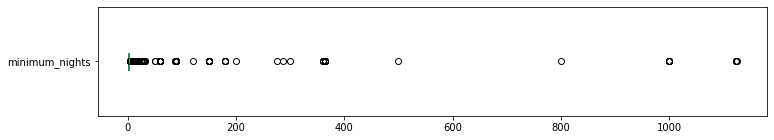

minimum_nights: valores acima de 1000:
7751 entradas
0.0333%


In [27]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.plot(kind='box', vert=False, figsize=(12,2))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 1000:")
print("{} entradas".format(len(df[df.minimum_nights > 1])))
print("{:.4f}%".format((len(df[df.minimum_nights > 1000]) / df.shape[0])*100))

In [28]:
# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));


price: valores acima de 1500
34 entradas
0.2830%


### **Q4. Qual a correlação existente entre as variáveis**

In [42]:
# criar uma matriz de correlação
corr = df [['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.001167,-0.008881,-0.006407,0.000623,0.005790
minimum_nights,0.001167,1.000000,-0.021830,-0.038876,-0.027854,-0.026396
number_of_reviews,-0.008881,-0.021830,1.000000,0.540593,0.023775,-0.027000
reviews_per_month,-0.006407,-0.038876,0.540593,1.000000,0.064426,0.080334
calculated_host_listings_count,0.000623,-0.027854,0.023775,0.064426,1.000000,0.140948
availability_365,0.005790,-0.026396,-0.027000,0.080334,0.140948,1.000000


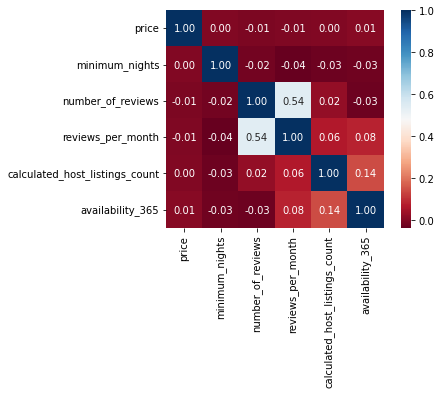

In [43]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [44]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clear.room_type.value_counts()

Entire home/apt    9522
Private room       1850
Hotel room          112
Shared room          98
Name: room_type, dtype: int64

In [45]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clear.room_type.value_counts() / df_clear.shape[0]

Entire home/apt    0.822138
Private room       0.159731
Hotel room         0.009670
Shared room        0.008461
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Porto?**



In [46]:
# ver preços por bairros, na média
df_clear.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Rossas                                       300.0
Cristelo                                     300.0
Paramos                                      299.0
Balazar                                      255.0
São Miguel do Mato                           250.0
São Miguel do Souto e Mosteirô               250.0
Bagunte, Ferreiró, Outeiro Maior e Parada    205.0
Covelas                                      200.0
Água Longa                                   190.0
Vila Nova do Campo                           188.4
Name: price, dtype: float64

Acima, vemos que bairros como Negrelos, Gião, estão com média de preço superior a de lugares como Paramos, Louredo e Balazar.

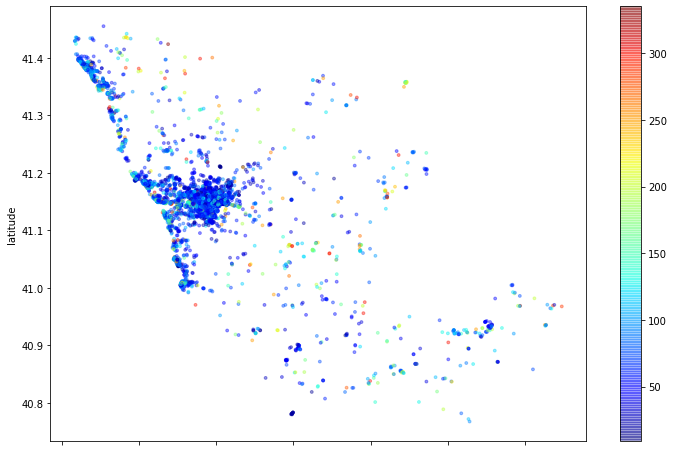

In [47]:
# plotar os imóveis pela latitude-longitude
df_clear.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clear['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

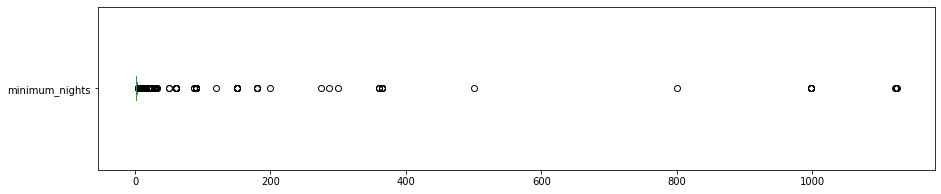

minimum_nights: valores acima de 30:
69 entradas
0.5744%


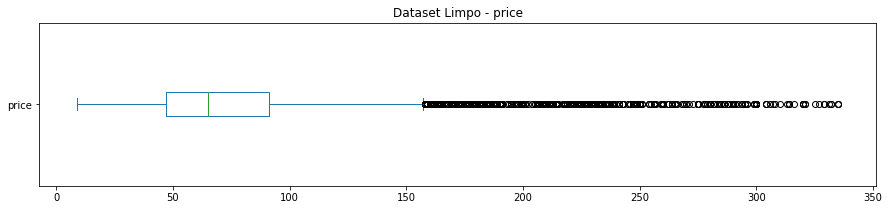

Tamanho original: 11582 colunas
Tamanho atual: 11582 colunas


In [48]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# mostrando a quantidade de dados ausentes por variável
(df.isnull().sum()).sort_values(ascending=False)

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

# verrificando o conjunto limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clear.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - price')
plt.show()
print("Tamanho original: {} colunas".format(df_clear.shape[0]))
print("Tamanho atual: {} colunas".format(df_clear.shape[0]))

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos.